# Разведочный анализ данных

Датасет содержит информацию о клиентах с указанием их дохода, возраста, суммы кредита и отношения кредита к доходу, а также бинарный таргет Default, указывающий на факт дефолта по кредиту (1 — дефолт, 0 — нет).

Основные признаки:

* Income — годовой доход клиента.
* Age — возраст клиента.
* Loan — сумма кредита, который был предоставлен клиенту.
* Loan to Income — отношение суммы кредита к доходу клиента.
* Default — бинарный таргет, указывающий, попал ли клиент в дефолт (1 = дефолт, 0 = нет).


## Предварительный обзор данных:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./Credit_Default.csv', delimiter= ',')
df.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


## Анализ пропущенных значений

In [4]:
missing_values = df.isnull().sum()
missing_values

,0
Income,0
Age,0
Loan,0
Loan to Income,0
Default,0


In [5]:
missing_percentage = missing_values/ len(df) * 100
missing_percentage

,0
Income,0.0
Age,0.0
Loan,0.0
Loan to Income,0.0
Default,0.0


In [6]:
missing_table = pd.DataFrame({'Column': df.columns,
                              'Missing_values': missing_values,
                              'Missing Percentage': missing_percentage}).reset_index(drop=True)
missing_table

,Column,Missing_values,Missing Percentage
0,Income,0,0.0
1,Age,0,0.0
2,Loan,0,0.0
3,Loan to Income,0,0.0
4,Default,0,0.0


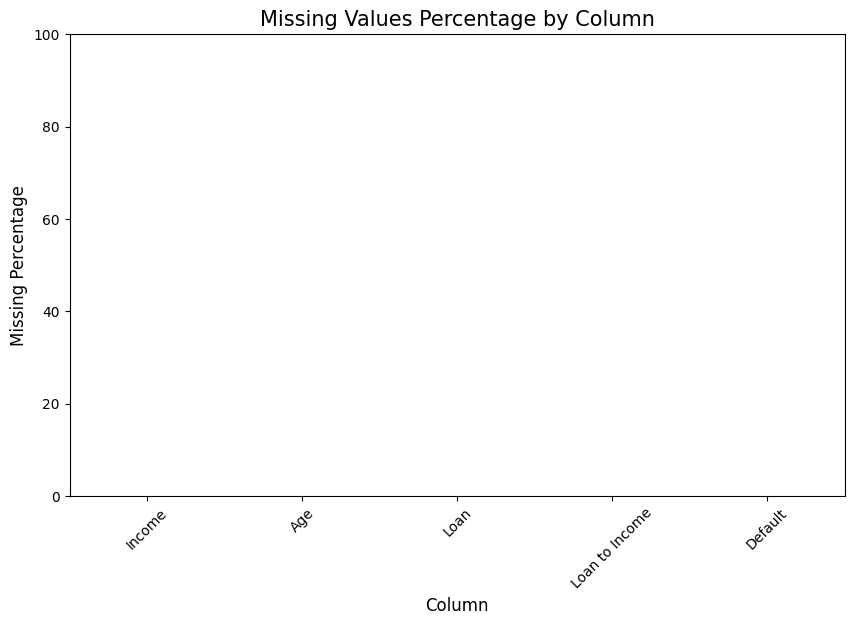

In [7]:
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='lightblue')
plt.xlabel('Column', fontsize=12)
plt.ylabel('Missing Percentage', fontsize=12)
plt.title('Missing Values Percentage by Column', fontsize=15)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()
plt.show()

 ## Построение диаграмм попарного распределения признаков

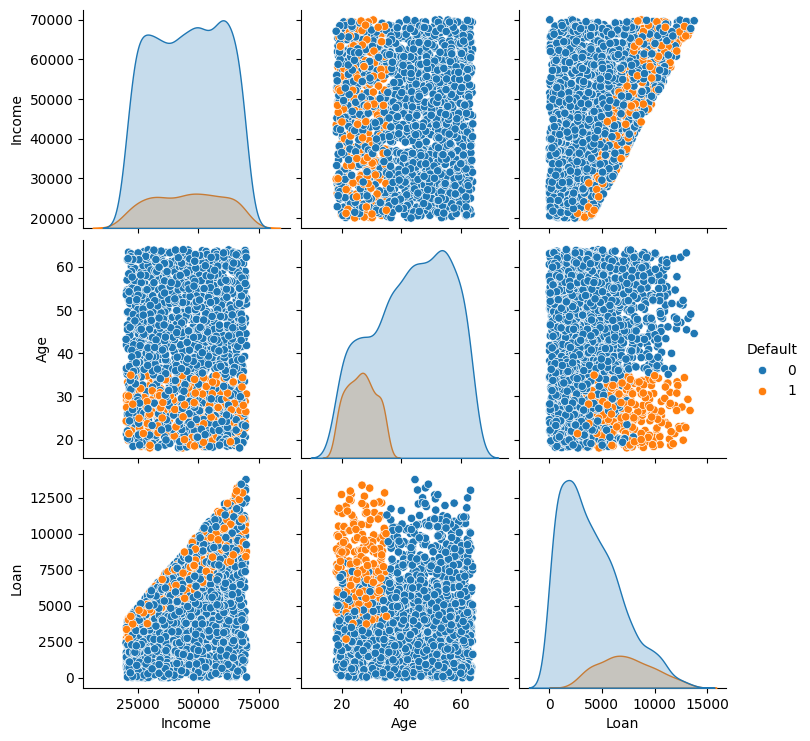

In [8]:
features = ['Income', 'Age', 'Loan','Default']
df_filtered = df[features]
sns.pairplot(df_filtered, hue='Default')
plt.show()

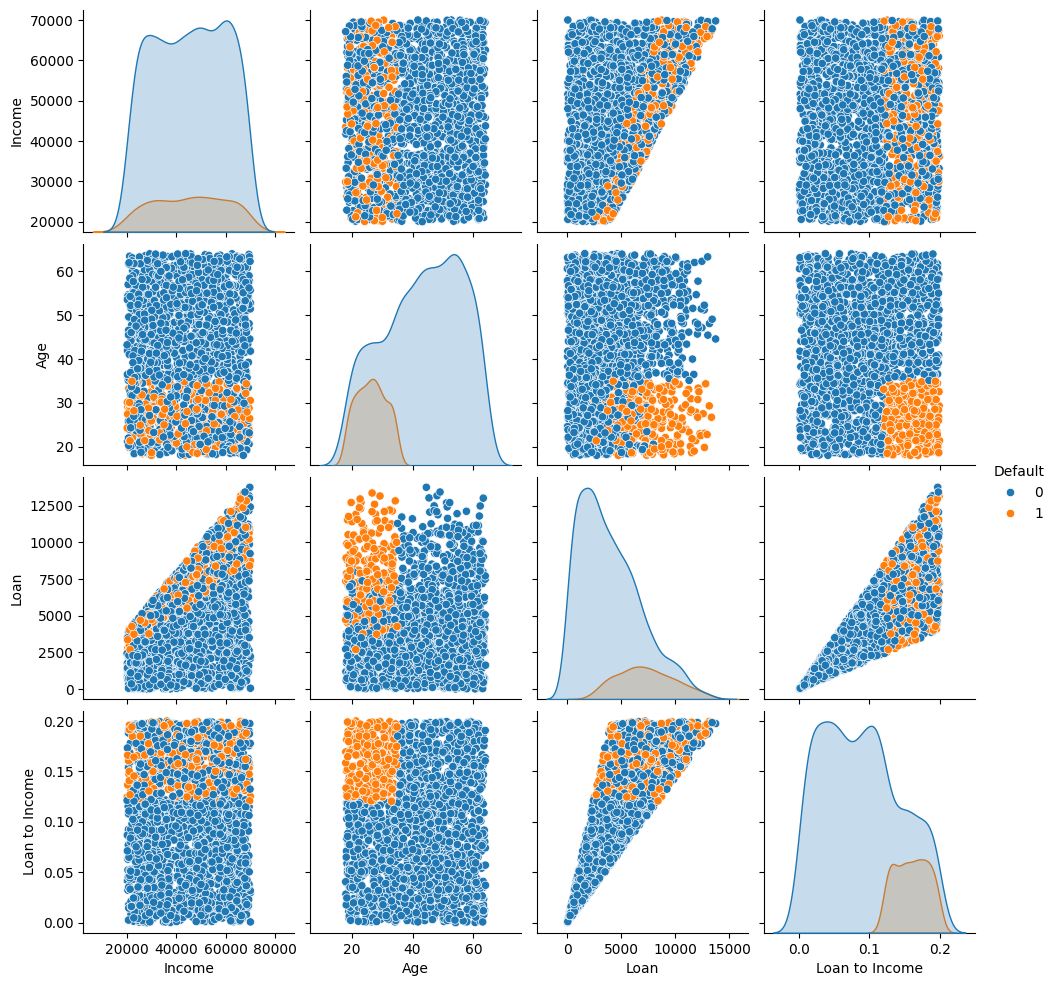

In [9]:
sns.pairplot(df, hue='Default')
plt.show()

На графиках попарного разделения признаков видно разделение на классы. Это позволяет сделать выводы о данных и оценить, насколько такое разделение может положительно повлиять на обучение модели. При этом для каждого отдельного признака картина отличается.

## Корреляционный анализ

In [10]:
correlation_matrix = df.corr()
correlation_matrix

,Income,Age,Loan,Loan to Income,Default
Income,1.000000,-0.034984,0.441117,-0.019862,0.002284
Age,-0.034984,1.000000,0.006561,0.021588,-0.444765
Loan,0.441117,0.006561,1.000000,0.847495,0.377160
Loan to Income,-0.019862,0.021588,0.847495,1.000000,0.433261
Default,0.002284,-0.444765,0.377160,0.433261,1.000000


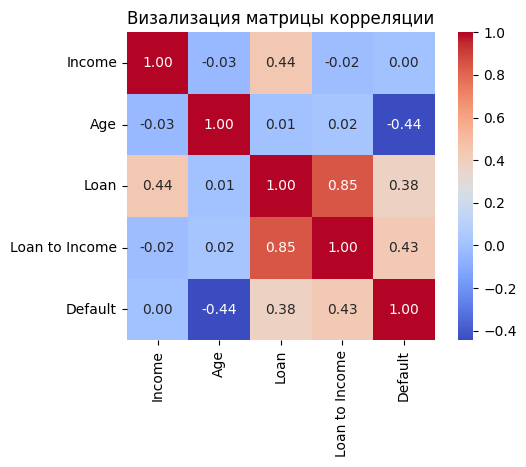

In [11]:
plt.figure(figsize = (6,4))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', fmt='.2f',square=True)
plt.title('Визализация матрицы корреляции')
plt.show()

На основе матрицы корреляции можно отметить следующие наблюдения:

* Между признаками "Loan" и "Loan to Income" существует высокая положительная корреляция (0.85).
* Корреляция признака "Default" с другими переменными мала, что указывает на сложность выявления факторов, влияющих на вероятность дефолта.
* Между "Age" и "Default" наблюдается отрицательная корреляция, что может свидетельствовать о снижении вероятности дефолта с увеличением возраста.

## Анализ баланса классов

In [12]:
classes = df['Default'].value_counts()
classes

,count
Default,
0,1717
1,283


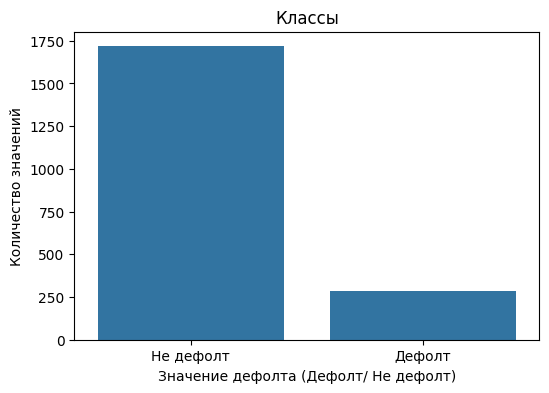

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x= classes.index, y=classes.values)
plt.title('Классы')
plt.xlabel('Значение дефолта (Дефолт/ Не дефолт)')
plt.ylabel('Количество значений')
plt.xticks(ticks=[0,1], labels=['Не дефолт','Дефолт'])
plt.show()

На графиках заметен значительный дисбаланс: класс "Не дефолт" существенно преобладает над классом "Дефолт". Для устранения этого необходимо применить метод балансировки классов.

# Заключение
* Требуется использование методов для балансировки классов
* Парные графики демонстрируют чёткое разделение на классы
* Пропуски в данных отсутствуют
* Выявлена сильная зависимость между суммой кредита ("Loan") и отношением суммы кредита к доходу клиента ("Loan to Income")